In [89]:
# PYTHON JUPYTER GAME - Hoverbird
# By Per Lindholm 2020-feb-26 10:01:22

# The aim the game is to keep the birt hovering so close to x = 1 as possible the time iteration of 10000 steps
# Using my diff. eq. solver

In [90]:
import numpy as np
import pylab as plt

import chainer
import chainer.functions as F
import chainer.links as L

In [91]:
class Model(chainer.Chain):
    def __init__(self,hidden,out):
        super(Model, self).__init__()
        with self.init_scope():
            self.l0 = L.Linear(None,hidden)
            self.l1 = L.Linear(None,hidden)
            self.l2 = L.Linear(None,out)
    def __call__(self, x):
        x = F.relu(self.l0(x))
        x = F.relu(self.l1(x))
        x = (self.l2(x))
        return x

In [92]:
model = Model(100,1)
optimizer = chainer.optimizers.SMORMS3()
optimizer.setup(model)

sol = [] 

In [93]:
def rnge():
    return np.array([1,0]).reshape(1,-1).astype(np.float32)

t= 0.2 loss 5.3072945e-05 x =  0.9927376078694924


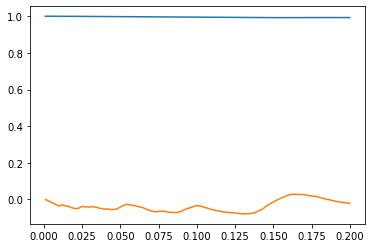

t= 0.4 loss 0.00032217035 x =  0.9819847774111037


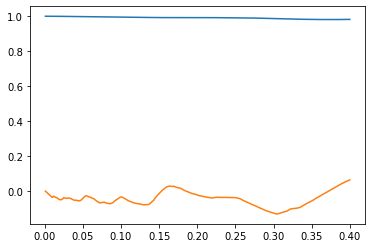

t= 0.6 loss 3.9065256e-08 x =  1.000222868307469


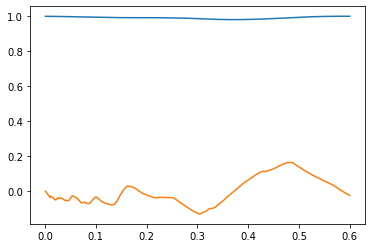

t= 0.8 loss 0.00029279664 x =  1.0169805487721202


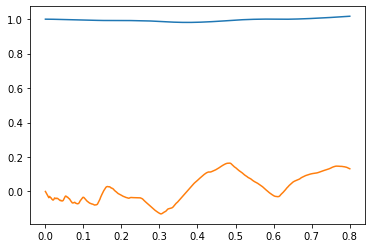

t= 1.0 loss 0.00043545614 x =  1.0209751956696411


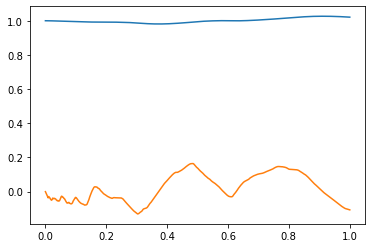

t= 1.2 loss 5.25981e-05 x =  1.007207609844302


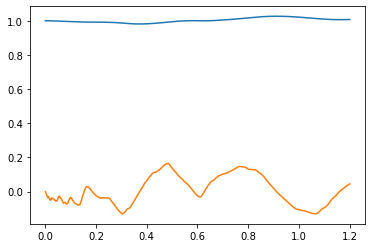

t= 1.4000000000000001 loss 0.00046871547 x =  1.0216614896377956


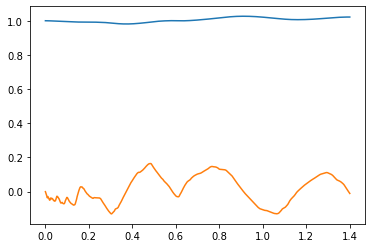

t= 1.6 loss 4.5096526e-06 x =  0.9980571000966035


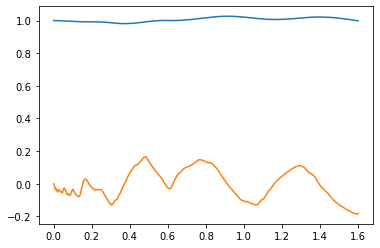

t= 1.8 loss 0.00096370815 x =  0.9690853504413334


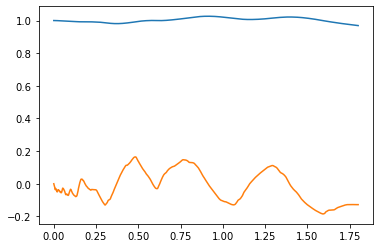

t= 2.0 loss 0.0021497596 x =  0.9536217365536415


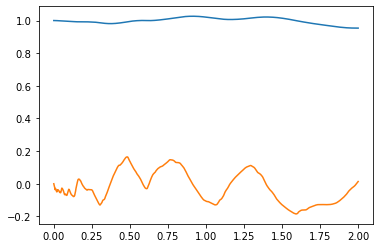

t= 2.2 loss 0.0006345599 x =  0.9746323013797984


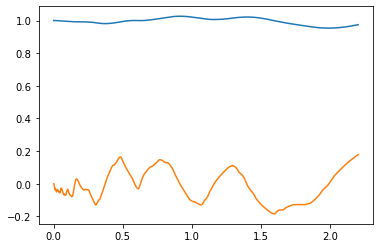

t= 2.4 loss 0.00013593289 x =  1.0115220101198077


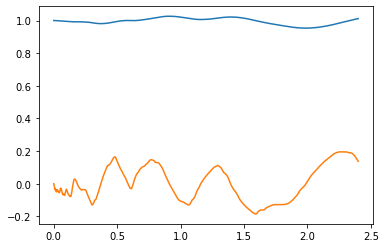

t= 2.6 loss 0.0010073866 x =  1.031673235532889


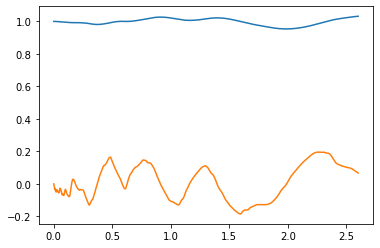

t= 2.8000000000000003 loss 0.0013328402 x =  1.0365195713328201


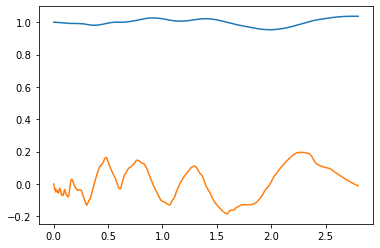

t= 3.0 loss 0.0010353728 x =  1.0322008251182648


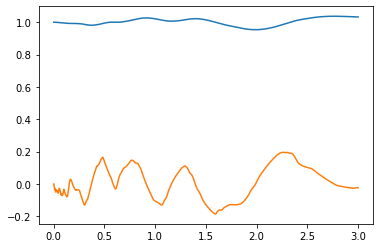

t= 3.2 loss 0.00070048764 x =  1.0265050448114454


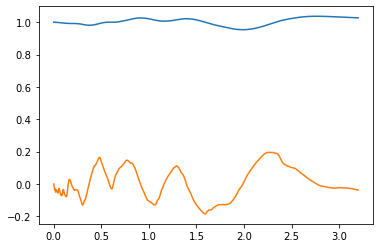

t= 3.4 loss 0.00018803662 x =  1.0138157173301985


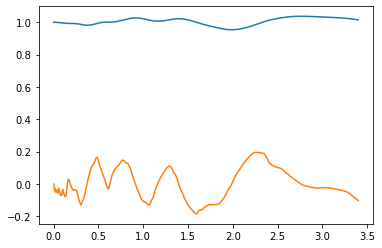

t= 3.6 loss 0.00022113604 x =  0.9853146696491135


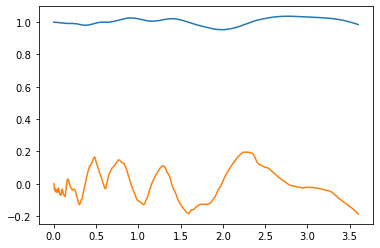

t= 3.8000000000000003 loss 0.0035454556 x =  0.9407043384350824


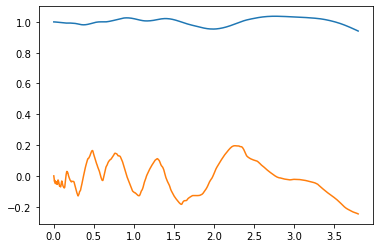

t= 4.0 loss 0.012642349 x =  0.8878424316428172


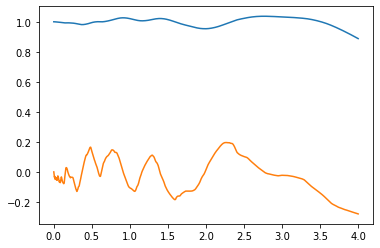

t= 4.2 loss 0.028892245 x =  0.8303040192458183


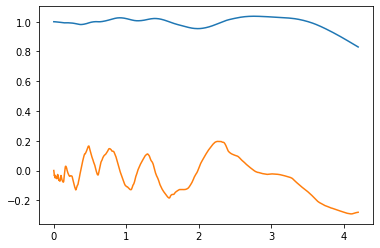

t= 4.4 loss 0.05017161 x =  0.776259664680688


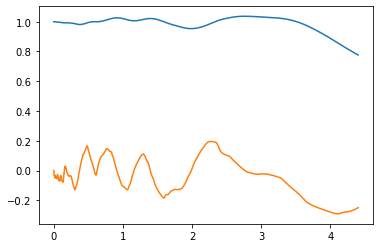

t= 4.6000000000000005 loss 0.070442185 x =  0.7347526951605509


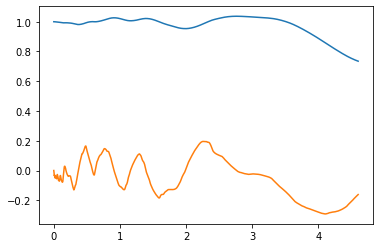

t= 4.8 loss 0.079658024 x =  0.7177359509371604


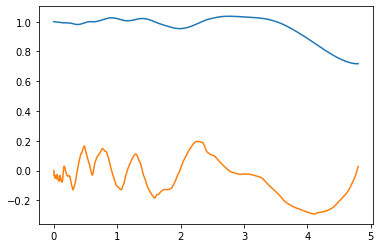

t= 5.0 loss 0.06365843 x =  0.7474459388597676


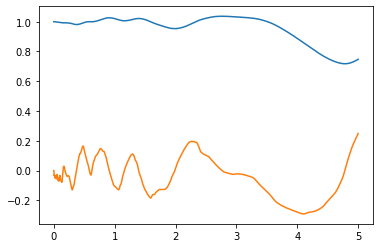

t= 5.2 loss 0.03476018 x =  0.813153982688525


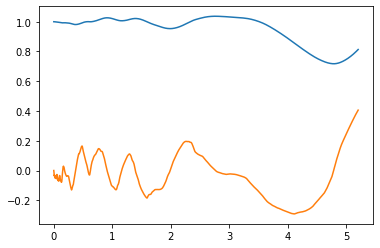

t= 5.4 loss 0.008527159 x =  0.9071361624329246


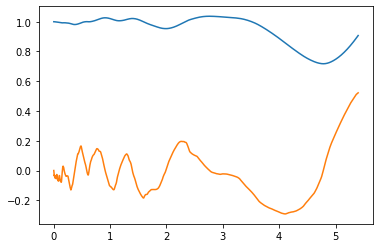

t= 5.6000000000000005 loss 0.0003494717 x =  1.0181146665250091


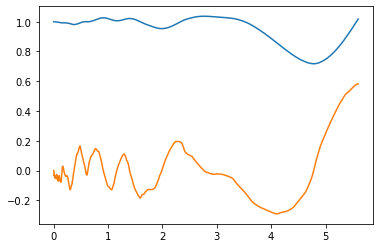

t= 5.8 loss 0.019325623 x =  1.1383971688951755


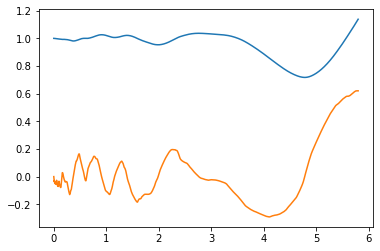

t= 6.0 loss 0.06726227 x =  1.2587707276332214


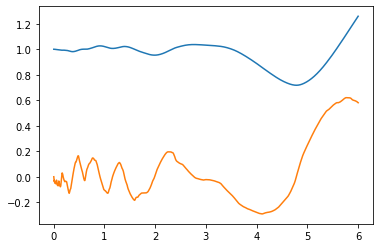

t= 6.2 loss 0.13252166 x =  1.3635752105336958


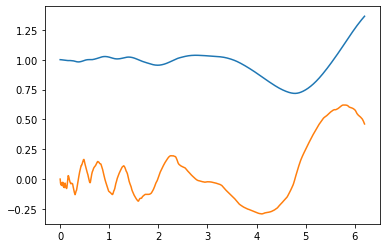

t= 6.4 loss 0.19186695 x =  1.4377396960058828


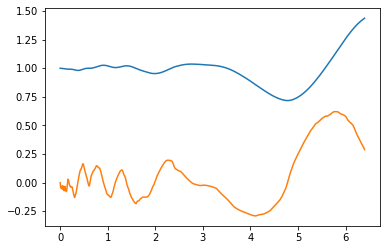

t= 6.6000000000000005 loss 0.22737174 x =  1.47672465314644


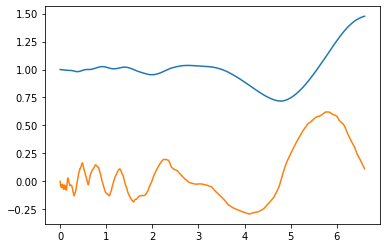

t= 6.8 loss 0.2305004 x =  1.480200998994609


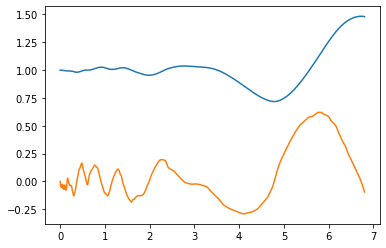

t= 7.0 loss 0.18958084 x =  1.435743505480957


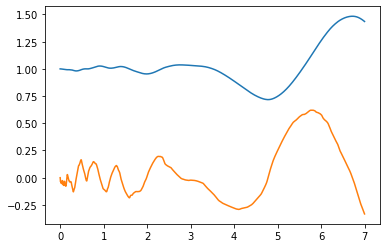

t= 7.2 loss 0.12135581 x =  1.3488926296202968


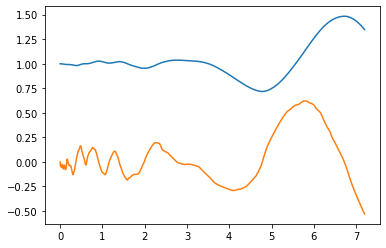

t= 7.4 loss 0.050182506 x =  1.2247215787771104


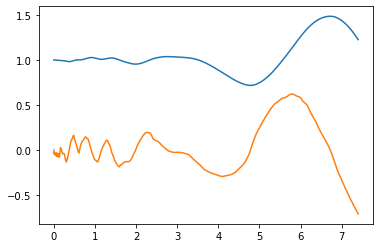

t= 7.6000000000000005 loss 0.004806315 x =  1.0701513636414086


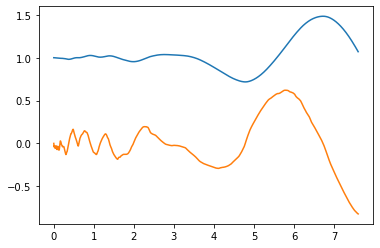

t= 7.8 loss 0.009833052 x =  0.901700661446734


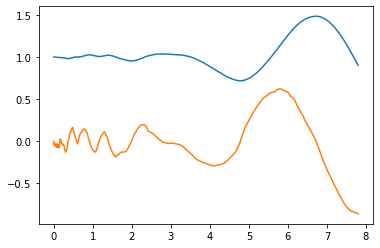

t= 8.0 loss 0.07525945 x =  0.7265300258262981


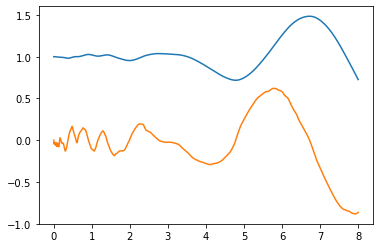

t= 8.2 loss 0.19323516 x =  0.5611801385748946


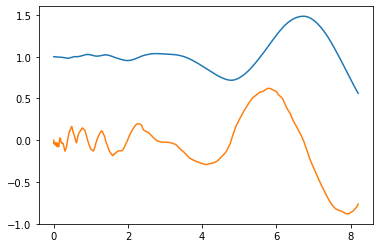

t= 8.4 loss 0.3232133 x =  0.4319873002132848


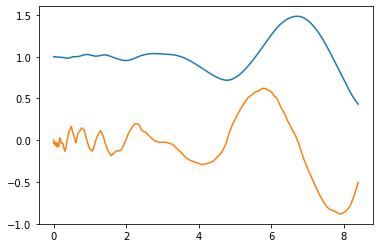

t= 8.6 loss 0.41478404 x =  0.35622138054589386


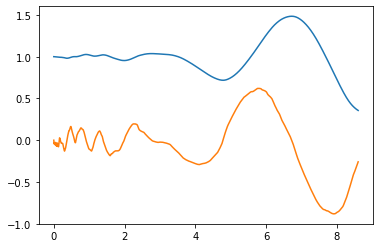

t= 8.8 loss 0.4475663 x =  0.3309727887760879


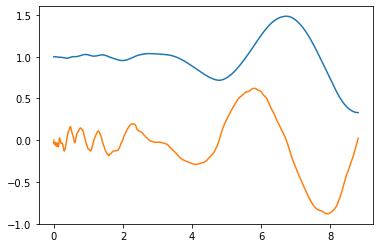

t= 9.0 loss 0.4042971 x =  0.3638723122378416


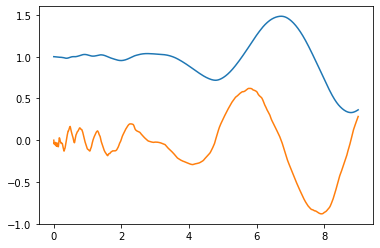

t= 9.200000000000001 loss 0.31125024 x =  0.4416010748819083


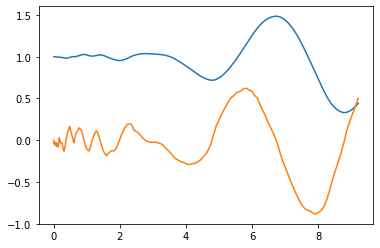

t= 9.4 loss 0.1883437 x =  0.5652662024236014


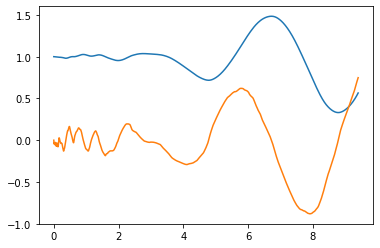

t= 9.6 loss 0.06748097 x =  0.7392376034955266


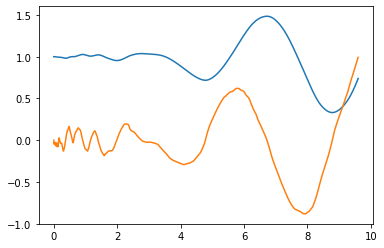

t= 9.8 loss 0.0015664338 x =  0.9592168532215901


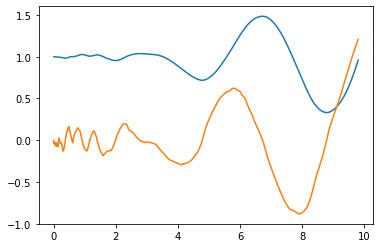

In [94]:
N = 100000
x = 1
y = 0
g = 9.81

delta_t = 0.001

for i in range(1,10000):
    
    t = i*delta_t
    sol.append((t,x,y))
    
    f = model(rnge()) # Change rnge() = [1,0] to something else
    
    xp = y #dx/dt
    yp = -g + 2*g*f.array[0,0] #dx2/dt2 # Change here 2*g*f.array[0,0] is the added up or down force.
    
    x = x+xp*delta_t
    X = np.linspace(x-0.15*x,x+0.15*x,N).reshape(-1)
    ids = np.argmin((np.repeat(x,N)-X)**2)
    x = X[ids]
    
    y = y+yp*delta_t
    Y = np.linspace(y-0.15*y,y+0.15*y,N).reshape(-1)
    ids = np.argmin((np.repeat(y,N)-Y)**2)
    y = Y[ids]
    
    loss = F.mean_squared_error(yp+f,-g+2*g*f+f)
    loss += F.mean_squared_error(x+f,1+f*0.999999) # change the hack
  
    model.cleargrads()
    loss.backward()
    optimizer.update()
    
    if i%200==0:
        print("t=",np.array(sol)[-1,0],"loss",loss.array,"x = ",np.array(sol)[-1,1])
        plt.plot(np.array(sol)[:,0],np.array(sol)[:,1])
        plt.plot(np.array(sol)[:,0],np.array(sol)[:,2])
        plt.show()


In [95]:
x

1.2147746582578836